In [1]:
import pandas as pd
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.utils.class_weight import compute_sample_weight

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
df = pd.read_csv("/home/local/ASURITE/speddira/dev/traffic_sense_net/city_scale/processed_datasets/2024-2-16_1915hours_8jun_600_win_600twin.csv")

/tmp/ipykernel_2837254/1740528188.py:1: DtypeWarning: Columns (129,131,132,134) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/home/local/ASURITE/speddira/dev/traffic_sense_net/city_scale/processed_datasets/2024-2-16_1915hours_8jun_600_win_600twin.csv")


In [4]:
df.head()

,Unnamed: 0,step,rolling_junction_mean_speed_0,rolling_traffic_count_0,rolling_traffic_occupancy_0,rolling_junction_mean_speed_1,rolling_traffic_count_1,rolling_traffic_occupancy_1,rolling_junction_mean_speed_2,rolling_traffic_count_2,rolling_traffic_occupancy_2,rolling_junction_mean_speed_3,rolling_traffic_count_3,rolling_traffic_occupancy_3,rolling_junction_mean_speed_4,rolling_traffic_count_4,rolling_traffic_occupancy_4,rolling_junction_mean_speed_5,rolling_traffic_count_5,rolling_traffic_occupancy_5,rolling_junction_mean_speed_6,rolling_traffic_count_6,rolling_traffic_occupancy_6,rolling_junction_mean_speed_7,rolling_traffic_count_7,rolling_traffic_occupancy_7,rolling_junction_mean_speed_8,rolling_traffic_count_8,rolling_traffic_occupancy_8,rolling_junction_mean_speed_9,rolling_traffic_count_9,rolling_traffic_occupancy_9,rolling_junction_mean_speed_10,rolling_traffic_count_10,rolling_traffic_occupancy_10,rolling_junction_mean_speed_11,rolling_traffic_count_11,rolling_traffic_occupancy_11,rolling_junction_mean_speed_12,rolling_traffic_count_12,rolling_traffic_occupancy_12,rolling_junction_mean_speed_13,rolling_traffic_count_13,rolling_traffic_occupancy_13,rolling_junction_mean_speed_14,rolling_traffic_count_14,rolling_traffic_occupancy_14,rolling_junction_mean_speed_15,rolling_traffic_count_15,rolling_traffic_occupancy_15,rolling_junction_mean_speed_16,rolling_traffic_count_16,rolling_traffic_occupancy_16,rolling_junction_mean_speed_17,rolling_traffic_count_17,rolling_traffic_occupancy_17,rolling_junction_mean_speed_18,rolling_traffic_count_18,rolling_traffic_occupancy_18,rolling_junction_mean_speed_19,rolling_traffic_count_19,rolling_traffic_occupancy_19,rolling_junction_mean_speed_20,rolling_traffic_count_20,rolling_traffic_occupancy_20,rolling_junction_mean_speed_21,rolling_traffic_count_21,rolling_traffic_occupancy_21,rolling_junction_mean_speed_22,rolling_traffic_count_22,rolling_traffic_occupancy_22,rolling_junction_mean_speed_23,rolling_traffic_count_23,rolling_traffic_occupancy_23,rolling_junction_mean_speed_24,rolling_traffic_count_24,rolling_traffic_occupancy_24,rolling_junction_mean_speed_25,rolling_traffic_count_25,rolling_traffic_occupancy_25,rolling_junction_mean_speed_26,rolling_traffic_count_26,rolling_traffic_occupancy_26,rolling_junction_mean_speed_27,rolling_traffic_count_27,rolling_traffic_occupancy_27,rolling_junction_mean_speed_28,rolling_traffic_count_28,rolling_traffic_occupancy_28,rolling_junction_mean_speed_29,rolling_traffic_count_29,rolling_traffic_occupancy_29,rolling_junction_mean_speed_30,rolling_traffic_count_30,rolling_traffic_occupancy_30,rolling_junction_mean_speed_31,rolling_traffic_count_31,rolling_traffic_occupancy_31,rolling_junction_mean_speed_32,rolling_traffic_count_32,rolling_traffic_occupancy_32,rolling_junction_mean_speed_33,rolling_traffic_count_33,rolling_traffic_occupancy_33,rolling_junction_mean_speed_34,rolling_traffic_count_34,rolling_traffic_occupancy_34,rolling_junction_mean_speed_35,rolling_traffic_count_35,rolling_traffic_occupancy_35,rolling_junction_mean_speed_36,rolling_traffic_count_36,rolling_traffic_occupancy_36,rolling_junction_mean_speed_37,rolling_traffic_count_37,rolling_traffic_occupancy_37,rolling_junction_mean_speed_38,rolling_traffic_count_38,rolling_traffic_occupancy_38,rolling_junction_mean_speed_39,rolling_traffic_count_39,rolling_traffic_occupancy_39,rolling_junction_mean_speed_40,rolling_traffic_count_40,rolling_traffic_occupancy_40,rolling_junction_mean_speed_41,rolling_traffic_count_41,rolling_traffic_occupancy_41,time_of_day,incident_edge,incident_start_time,incident_type,accident_id,accident_duration,incident_lane,accident_label,rolling_travel_time_3_5,rolling_travel_time_10_4,rolling_travel_time_8_11,rolling_travel_time_14_9,rolling_travel_time_30_33,rolling_travel_time_38_31,rolling_travel_time_34_39,rolling_travel_time_42_35,rolling_travel_time_32_2,rolling_travel_time_1_29,rolling_travel_time_26_13,rolling_travel_time_12_27,rolling_travel_time

In [5]:
df.isna().sum()

Unnamed: 0                              0
step                                    0
rolling_junction_mean_speed_0         708
rolling_traffic_count_0               708
rolling_traffic_occupancy_0           708
rolling_junction_mean_speed_1         708
rolling_traffic_count_1               708
rolling_traffic_occupancy_1           708
rolling_junction_mean_speed_2         708
rolling_traffic_count_2               708
rolling_traffic_occupancy_2           708
rolling_junction_mean_speed_3         708
rolling_traffic_count_3               708
rolling_traffic_occupancy_3           708
rolling_junction_mean_speed_4         708
rolling_traffic_count_4               708
rolling_traffic_occupancy_4           708
rolling_junction_mean_speed_5         708
rolling_traffic_count_5               708
rolling_traffic_occupancy_5           708
rolling_junction_mean_speed_6         708
rolling_traffic_count_6               708
rolling_traffic_occupancy_6           708
rolling_junction_mean_speed_7     

In [6]:
df = df[600:]
Y = df["accident_label"]
X = df.drop(["Unnamed: 0","step","incident_edge","incident_start_time","incident_type","accident_id","accident_duration","incident_lane","accident_label"],axis=1)

In [7]:
Y.head()

600    False
601    False
602    False
603    False
604    False
Name: accident_label, dtype: bool

In [8]:
print(Y.shape)

(3391582,)


In [9]:
X.head()

,rolling_junction_mean_speed_0,rolling_traffic_count_0,rolling_traffic_occupancy_0,rolling_junction_mean_speed_1,rolling_traffic_count_1,rolling_traffic_occupancy_1,rolling_junction_mean_speed_2,rolling_traffic_count_2,rolling_traffic_occupancy_2,rolling_junction_mean_speed_3,rolling_traffic_count_3,rolling_traffic_occupancy_3,rolling_junction_mean_speed_4,rolling_traffic_count_4,rolling_traffic_occupancy_4,rolling_junction_mean_speed_5,rolling_traffic_count_5,rolling_traffic_occupancy_5,rolling_junction_mean_speed_6,rolling_traffic_count_6,rolling_traffic_occupancy_6,rolling_junction_mean_speed_7,rolling_traffic_count_7,rolling_traffic_occupancy_7,rolling_junction_mean_speed_8,rolling_traffic_count_8,rolling_traffic_occupancy_8,rolling_junction_mean_speed_9,rolling_traffic_count_9,rolling_traffic_occupancy_9,rolling_junction_mean_speed_10,rolling_traffic_count_10,rolling_traffic_occupancy_10,rolling_junction_mean_speed_11,rolling_traffic_count_11,rolling_traffic_occupancy_11,rolling_junction_mean_speed_12,rolling_traffic_count_12,rolling_traffic_occupancy_12,rolling_junction_mean_speed_13,rolling_traffic_count_13,rolling_traffic_occupancy_13,rolling_junction_mean_speed_14,rolling_traffic_count_14,rolling_traffic_occupancy_14,rolling_junction_mean_speed_15,rolling_traffic_count_15,rolling_traffic_occupancy_15,rolling_junction_mean_speed_16,rolling_traffic_count_16,rolling_traffic_occupancy_16,rolling_junction_mean_speed_17,rolling_traffic_count_17,rolling_traffic_occupancy_17,rolling_junction_mean_speed_18,rolling_traffic_count_18,rolling_traffic_occupancy_18,rolling_junction_mean_speed_19,rolling_traffic_count_19,rolling_traffic_occupancy_19,rolling_junction_mean_speed_20,rolling_traffic_count_20,rolling_traffic_occupancy_20,rolling_junction_mean_speed_21,rolling_traffic_count_21,rolling_traffic_occupancy_21,rolling_junction_mean_speed_22,rolling_traffic_count_22,rolling_traffic_occupancy_22,rolling_junction_mean_speed_23,rolling_traffic_count_23,rolling_traffic_occupancy_23,rolling_junction_mean_speed_24,rolling_traffic_count_24,rolling_traffic_occupancy_24,rolling_junction_mean_speed_25,rolling_traffic_count_25,rolling_traffic_occupancy_25,rolling_junction_mean_speed_26,rolling_traffic_count_26,rolling_traffic_occupancy_26,rolling_junction_mean_speed_27,rolling_traffic_count_27,rolling_traffic_occupancy_27,rolling_junction_mean_speed_28,rolling_traffic_count_28,rolling_traffic_occupancy_28,rolling_junction_mean_speed_29,rolling_traffic_count_29,rolling_traffic_occupancy_29,rolling_junction_mean_speed_30,rolling_traffic_count_30,rolling_traffic_occupancy_30,rolling_junction_mean_speed_31,rolling_traffic_count_31,rolling_traffic_occupancy_31,rolling_junction_mean_speed_32,rolling_traffic_count_32,rolling_traffic_occupancy_32,rolling_junction_mean_speed_33,rolling_traffic_count_33,rolling_traffic_occupancy_33,rolling_junction_mean_speed_34,rolling_traffic_count_34,rolling_traffic_occupancy_34,rolling_junction_mean_speed_35,rolling_traffic_count_35,rolling_traffic_occupancy_35,rolling_junction_mean_speed_36,rolling_traffic_count_36,rolling_traffic_occupancy_36,rolling_junction_mean_speed_37,rolling_traffic_count_37,rolling_traffic_occupancy_37,rolling_junction_mean_speed_38,rolling_traffic_count_38,rolling_traffic_occupancy_38,rolling_junction_mean_speed_39,rolling_traffic_count_39,rolling_traffic_occupancy_39,rolling_junction_mean_speed_40,rolling_traffic_count_40,rolling_traffic_occupancy_40,rolling_junction_mean_speed_41,rolling_traffic_count_41,rolling_traffic_occupancy_41,time_of_day,rolling_travel_time_3_5,rolling_travel_time_10_4,rolling_travel_time_8_11,rolling_travel_time_14_9,rolling_travel_time_30_33,rolling_travel_time_38_31,rolling_travel_time_34_39,rolling_travel_time_42_35,rolling_travel_time_32_2,rolling_travel_time_1_29,rolling_travel_time_26_13,rolling_travel_time_12_27,rolling_travel_time_40_25,rolling_travel_time_24_41,rolling_travel_time_6_22,rolling_travel_time_21_7,rolling_travel_time_1_16,rolling_travel_

In [10]:
print(X.shape)

(3391582, 151)


In [11]:
def standardize(col):
   return (col - col.mean()) / col.std()

X = X.apply(standardize)

In [12]:
X.head()

,rolling_junction_mean_speed_0,rolling_traffic_count_0,rolling_traffic_occupancy_0,rolling_junction_mean_speed_1,rolling_traffic_count_1,rolling_traffic_occupancy_1,rolling_junction_mean_speed_2,rolling_traffic_count_2,rolling_traffic_occupancy_2,rolling_junction_mean_speed_3,rolling_traffic_count_3,rolling_traffic_occupancy_3,rolling_junction_mean_speed_4,rolling_traffic_count_4,rolling_traffic_occupancy_4,rolling_junction_mean_speed_5,rolling_traffic_count_5,rolling_traffic_occupancy_5,rolling_junction_mean_speed_6,rolling_traffic_count_6,rolling_traffic_occupancy_6,rolling_junction_mean_speed_7,rolling_traffic_count_7,rolling_traffic_occupancy_7,rolling_junction_mean_speed_8,rolling_traffic_count_8,rolling_traffic_occupancy_8,rolling_junction_mean_speed_9,rolling_traffic_count_9,rolling_traffic_occupancy_9,rolling_junction_mean_speed_10,rolling_traffic_count_10,rolling_traffic_occupancy_10,rolling_junction_mean_speed_11,rolling_traffic_count_11,rolling_traffic_occupancy_11,rolling_junction_mean_speed_12,rolling_traffic_count_12,rolling_traffic_occupancy_12,rolling_junction_mean_speed_13,rolling_traffic_count_13,rolling_traffic_occupancy_13,rolling_junction_mean_speed_14,rolling_traffic_count_14,rolling_traffic_occupancy_14,rolling_junction_mean_speed_15,rolling_traffic_count_15,rolling_traffic_occupancy_15,rolling_junction_mean_speed_16,rolling_traffic_count_16,rolling_traffic_occupancy_16,rolling_junction_mean_speed_17,rolling_traffic_count_17,rolling_traffic_occupancy_17,rolling_junction_mean_speed_18,rolling_traffic_count_18,rolling_traffic_occupancy_18,rolling_junction_mean_speed_19,rolling_traffic_count_19,rolling_traffic_occupancy_19,rolling_junction_mean_speed_20,rolling_traffic_count_20,rolling_traffic_occupancy_20,rolling_junction_mean_speed_21,rolling_traffic_count_21,rolling_traffic_occupancy_21,rolling_junction_mean_speed_22,rolling_traffic_count_22,rolling_traffic_occupancy_22,rolling_junction_mean_speed_23,rolling_traffic_count_23,rolling_traffic_occupancy_23,rolling_junction_mean_speed_24,rolling_traffic_count_24,rolling_traffic_occupancy_24,rolling_junction_mean_speed_25,rolling_traffic_count_25,rolling_traffic_occupancy_25,rolling_junction_mean_speed_26,rolling_traffic_count_26,rolling_traffic_occupancy_26,rolling_junction_mean_speed_27,rolling_traffic_count_27,rolling_traffic_occupancy_27,rolling_junction_mean_speed_28,rolling_traffic_count_28,rolling_traffic_occupancy_28,rolling_junction_mean_speed_29,rolling_traffic_count_29,rolling_traffic_occupancy_29,rolling_junction_mean_speed_30,rolling_traffic_count_30,rolling_traffic_occupancy_30,rolling_junction_mean_speed_31,rolling_traffic_count_31,rolling_traffic_occupancy_31,rolling_junction_mean_speed_32,rolling_traffic_count_32,rolling_traffic_occupancy_32,rolling_junction_mean_speed_33,rolling_traffic_count_33,rolling_traffic_occupancy_33,rolling_junction_mean_speed_34,rolling_traffic_count_34,rolling_traffic_occupancy_34,rolling_junction_mean_speed_35,rolling_traffic_count_35,rolling_traffic_occupancy_35,rolling_junction_mean_speed_36,rolling_traffic_count_36,rolling_traffic_occupancy_36,rolling_junction_mean_speed_37,rolling_traffic_count_37,rolling_traffic_occupancy_37,rolling_junction_mean_speed_38,rolling_traffic_count_38,rolling_traffic_occupancy_38,rolling_junction_mean_speed_39,rolling_traffic_count_39,rolling_traffic_occupancy_39,rolling_junction_mean_speed_40,rolling_traffic_count_40,rolling_traffic_occupancy_40,rolling_junction_mean_speed_41,rolling_traffic_count_41,rolling_traffic_occupancy_41,time_of_day,rolling_travel_time_3_5,rolling_travel_time_10_4,rolling_travel_time_8_11,rolling_travel_time_14_9,rolling_travel_time_30_33,rolling_travel_time_38_31,rolling_travel_time_34_39,rolling_travel_time_42_35,rolling_travel_time_32_2,rolling_travel_time_1_29,rolling_travel_time_26_13,rolling_travel_time_12_27,rolling_travel_time_40_25,rolling_travel_time_24_41,rolling_travel_time_6_22,rolling_travel_time_21_7,rolling_travel_time_1_16,rolling_travel_

In [13]:
X= X.values

In [14]:
Y= Y.values

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.99)

In [16]:
sample_weights = compute_sample_weight(
    class_weight='balanced',
    y=y_train #provide your own target name
)

In [29]:
model = XGBClassifier(booster='gbtree',eta=0.2,gamma=0.01)


In [30]:
model.fit(X_train, y_train,sample_weight=sample_weights)

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eta=0.2, eval_metric=None,
              feature_types=None, gamma=0.01, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [31]:
y_pred = model.predict(X)
print(y_pred)

[0 0 0 ... 0 0 0]


In [32]:
accuracy = accuracy_score(Y, y_pred)
precision = precision_score(Y, y_pred)
f1 = f1_score(Y, y_pred)
recall = recall_score(Y, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print("precision: %.2f%%" % (precision * 100.0))
print("f1: %.2f%%" % (f1 * 100.0))
print("recall: %.2f%%" % (recall * 100.0))

Accuracy: 92.13%
precision: 93.76%
f1: 90.49%
recall: 87.43%


In [33]:
from sklearn.metrics import roc_auc_score

# Assuming you have true labels (y_true) and predicted labels (y_pred)
auc_score = roc_auc_score(Y, y_pred)
print("auc_score: %.2f%%" % (auc_score * 100.0))

auc_score: 91.54%


<Axes: >

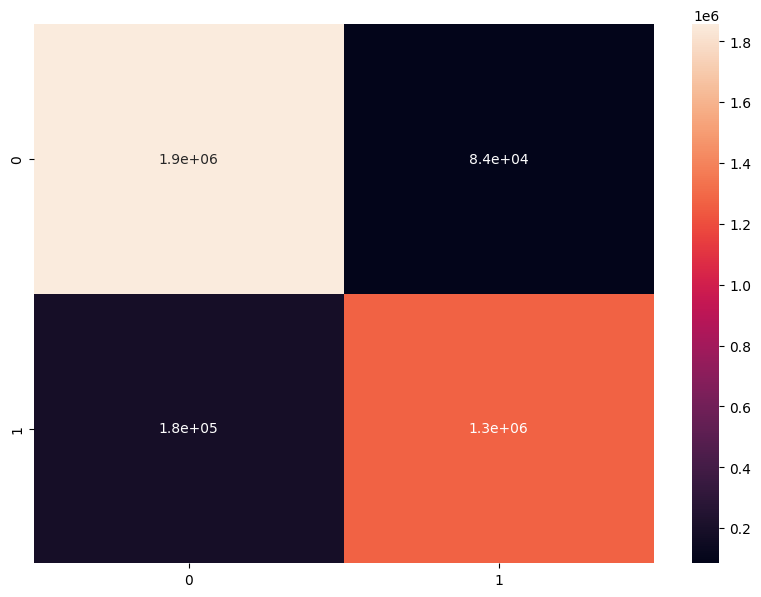

In [35]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
import matplotlib.pyplot as plt

matrix = confusion_matrix(Y, y_pred)
plt.figure(figsize = (10,7))
sn.heatmap(matrix, annot=True)


In [36]:
matrix

array([[1855791,   84394],
       [ 182454, 1268943]])